In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# Load dataset
df = pd.read_csv("Harry Potter 3.csv")

# Create a new column for sentiment
df['sentiment'] = df['Sentence'].apply(lambda x: TextBlob(x).sentiment[0])

# Create a new column for sentiment label
df['sentiment_label'] = ''

# Assign sentiment labels based on polarity
df.loc[df['sentiment'] > 0, 'sentiment_label'] = 'Positive'
df.loc[df['sentiment'] == 0, 'sentiment_label'] = 'Neutral'
df.loc[df['sentiment'] < 0, 'sentiment_label'] = 'Negative'

# Print the first 5 rows of the updated dataset
print(df.head())

      Character          Sentence  Sentiment  sentiment sentiment_label
0         HARRY   Lumos Maxima...        NaN        0.0         Neutral
1         HARRY   Lumos Maxima...        NaN        0.0         Neutral
2         HARRY   Lumos Maxima...        NaN        0.0         Neutral
3         HARRY  Lumos... MAXIMA!        NaN        0.0         Neutral
4  AUNT PETUNIA     Harry! Harry!        NaN        0.0         Neutral


In [20]:
df['Sentence'] = df['Sentence'].str.replace('[^a-zA-Z]', ' ')
df['Sentence'] = df['Sentence'].str.lower()
df.head()

/var/folders/tz/k4y848sd56d7b57921hs2bfm0000gn/T/ipykernel_67401/4021358668.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace('[^a-zA-Z]', ' ')


,Character,Sentence,Sentiment,sentiment,sentiment_label
0,HARRY,lumos maxima,NaN,0.0,Neutral
1,HARRY,lumos maxima,NaN,0.0,Neutral
2,HARRY,lumos maxima,NaN,0.0,Neutral
3,HARRY,lumos maxima,NaN,0.0,Neutral
4,AUNT PETUNIA,harry harry,NaN,0.0,Neutral


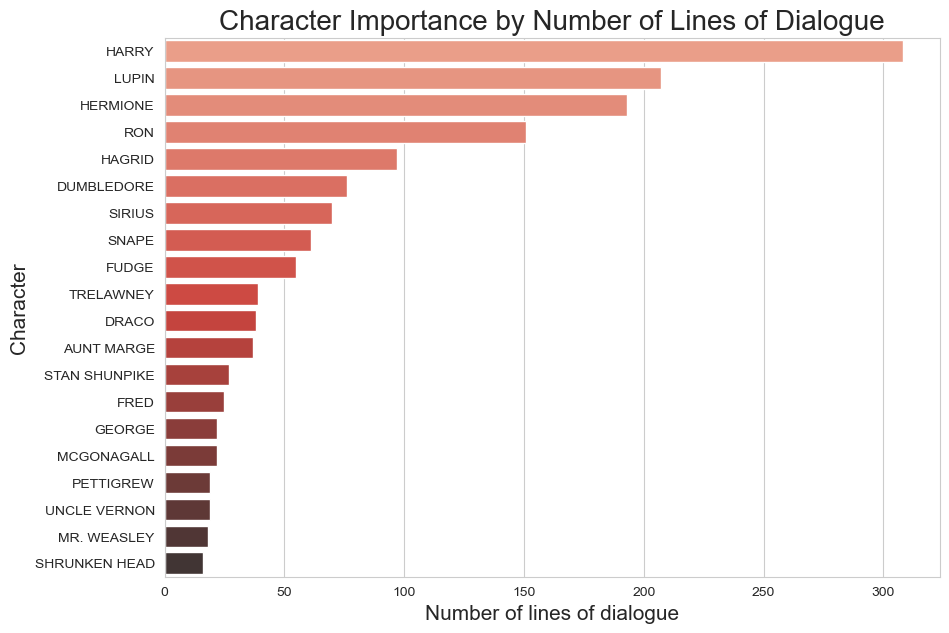

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(y='Character', data=df, order=df.Character.value_counts().iloc[:20].index, palette="Reds_d")
plt.xlabel('Number of lines of dialogue', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.title('Character Importance by Number of Lines of Dialogue', fontsize=20)
plt.show()

In [22]:
from collections import Counter
all_text = " ".join(text for text in df['Sentence'])
words = all_text.split()
word_counts = Counter(words)
print(word_counts.most_common(8))

[('you', 412), ('the', 297), ('i', 267), ('to', 236), ('s', 226), ('it', 218), ('a', 182), ('that', 145)]


In [23]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define a function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove symbols
    text = re.sub(r'[^\w\s]','',text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    cleaned_text = " ".join(filtered_words)
    return cleaned_text

# Clean the text column
df['Sentence'] = df['Sentence'].apply(clean_text)

[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


In [24]:
common_words = Counter(" ".join(df["Sentence"]).split()).most_common(10)
common_words

[('harry', 91),
 ('come', 70),
 ('well', 52),
 ('know', 44),
 ('one', 40),
 ('go', 39),
 ('see', 38),
 ('good', 35),
 ('think', 35),
 ('sirius', 35)]

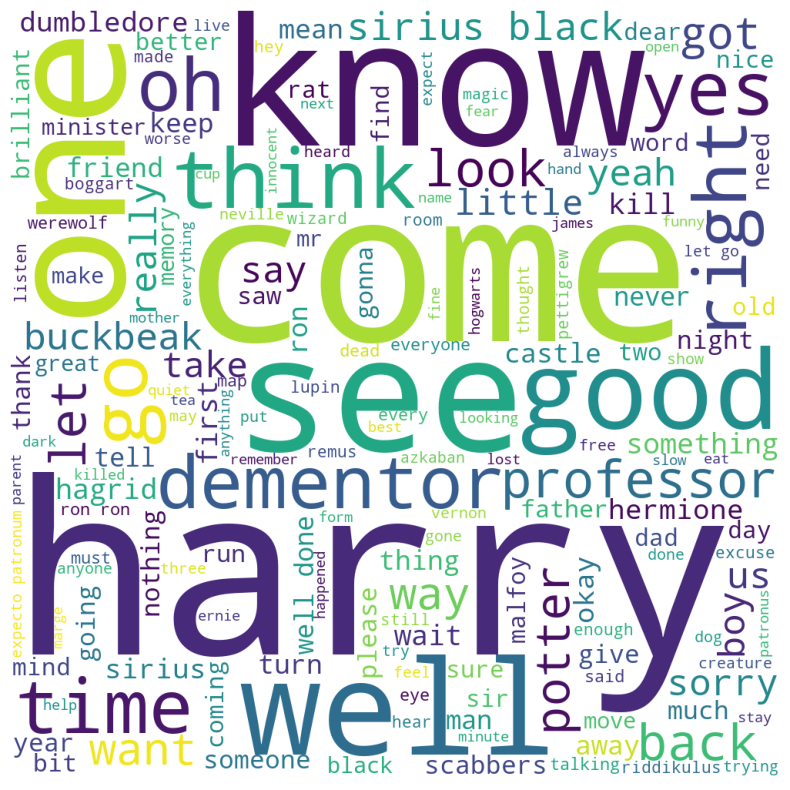

In [25]:
from wordcloud import WordCloud
text = " ".join(line for line in df["Sentence"])
wordcloud = WordCloud(width=1000, height=1000, background_color="white", min_font_size=15).generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [26]:
df['sentiment_label'].value_counts()['Positive']

335

In [27]:
df['sentiment_label'].value_counts()['Neutral']

1081

In [28]:
df['sentiment_label'].value_counts()['Negative']

222

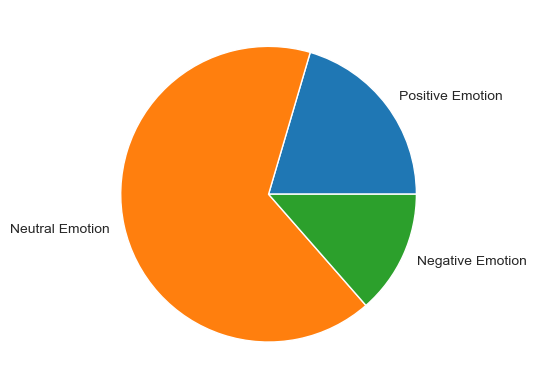

In [29]:
y = np.array([335,1081,222])
mylabels = ["Positive Emotion", "Neutral Emotion", "Negative Emotion"]

plt.pie(y, labels = mylabels)
plt.show() 

In [30]:
# Extract the text data
text_data = df['Sentence'].tolist()

# Tokenize the text data
tokens = [word_tokenize(text) for text in text_data]

# View the tokens
print(tokens)

[['lumos', 'maxima'], ['lumos', 'maxima'], ['lumos', 'maxima'], ['lumos', 'maxima'], ['harry', 'harry'], ['harry', 'open', 'door'], ['marge', 'lovely', 'see'], ['uncle', 'vernon', 'need', 'sign', 'form'], [], ['nothing', 'school', 'stuff'], ['later', 'perhaps', 'behave'], [], ['still'], ['yes'], ['say', 'yes', 'ungrateful', 'way'], ['damn', 'good', 'brother', 'keep'], ['straight', 'orphanage', 'dumped', 'doorstep'], ['dudders'], ['little', 'neffy', 'pooh'], ['give', 'us', 'kiss', 'come'], ['take', 'marge', 'suitcase', 'upstairs'], ['okay'], ['finish', 'mommy'], ['good', 'boy', 'rippy', 'pooh'], ['tempt', 'marge'], ['small', 'one'], ['excellent', 'nosh', 'petunia'], ['bit'], ['usually', 'fry', 'dogs'], ['bit', 'boy'], ['wan', 'na', 'try', 'little', 'drop', 'brandy'], ['little', 'drop', 'brandy', 'brandy', 'windy', 'wandy', 'rippy', 'pippy', 'pooh'], ['smirking'], ['send', 'boy', 'vernon'], ['st', 'brutus', 'fine', 'institution', 'hopeless', 'cases'], ['use', 'cane', 'st', 'brutus', 'boy

In [31]:
# Extract the text data
text_data = df['Sentence'].tolist()

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
vectors = vectorizer.fit_transform(text_data)

# View the vocabulary
print(vectorizer.vocabulary_)

# View the vectorized data
print(vectors.toarray())

{'lumos': 752, 'maxima': 783, 'harry': 580, 'open': 890, 'door': 327, 'marge': 774, 'lovely': 744, 'see': 1115, 'uncle': 1360, 'vernon': 1380, 'need': 849, 'sign': 1160, 'form': 485, 'nothing': 871, 'school': 1104, 'stuff': 1248, 'later': 685, 'perhaps': 932, 'behave': 90, 'still': 1233, 'yes': 1471, 'say': 1095, 'ungrateful': 1368, 'way': 1406, 'damn': 264, 'good': 535, 'brother': 143, 'keep': 666, 'straight': 1238, 'orphanage': 894, 'dumped': 345, 'doorstep': 329, 'dudders': 342, 'little': 719, 'neffy': 851, 'pooh': 959, 'give': 523, 'us': 1374, 'kiss': 673, 'come': 213, 'take': 1276, 'suitcase': 1260, 'upstairs': 1373, 'okay': 884, 'finish': 455, 'mommy': 819, 'boy': 128, 'rippy': 1063, 'tempt': 1291, 'small': 1185, 'one': 888, 'excellent': 390, 'nosh': 869, 'petunia': 940, 'bit': 103, 'usually': 1377, 'fry': 501, 'dogs': 324, 'wanna': 1396, 'try': 1348, 'drop': 338, 'brandy': 130, 'windy': 1433, 'wandy': 1395, 'pippy': 946, 'smirking': 1189, 'send': 1121, 'st': 1218, 'brutus': 147,